## Basic Call Functions 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
spotifyData = pd.read_csv('spotifyData.csv')
spotifyData.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

In [3]:
spotifyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

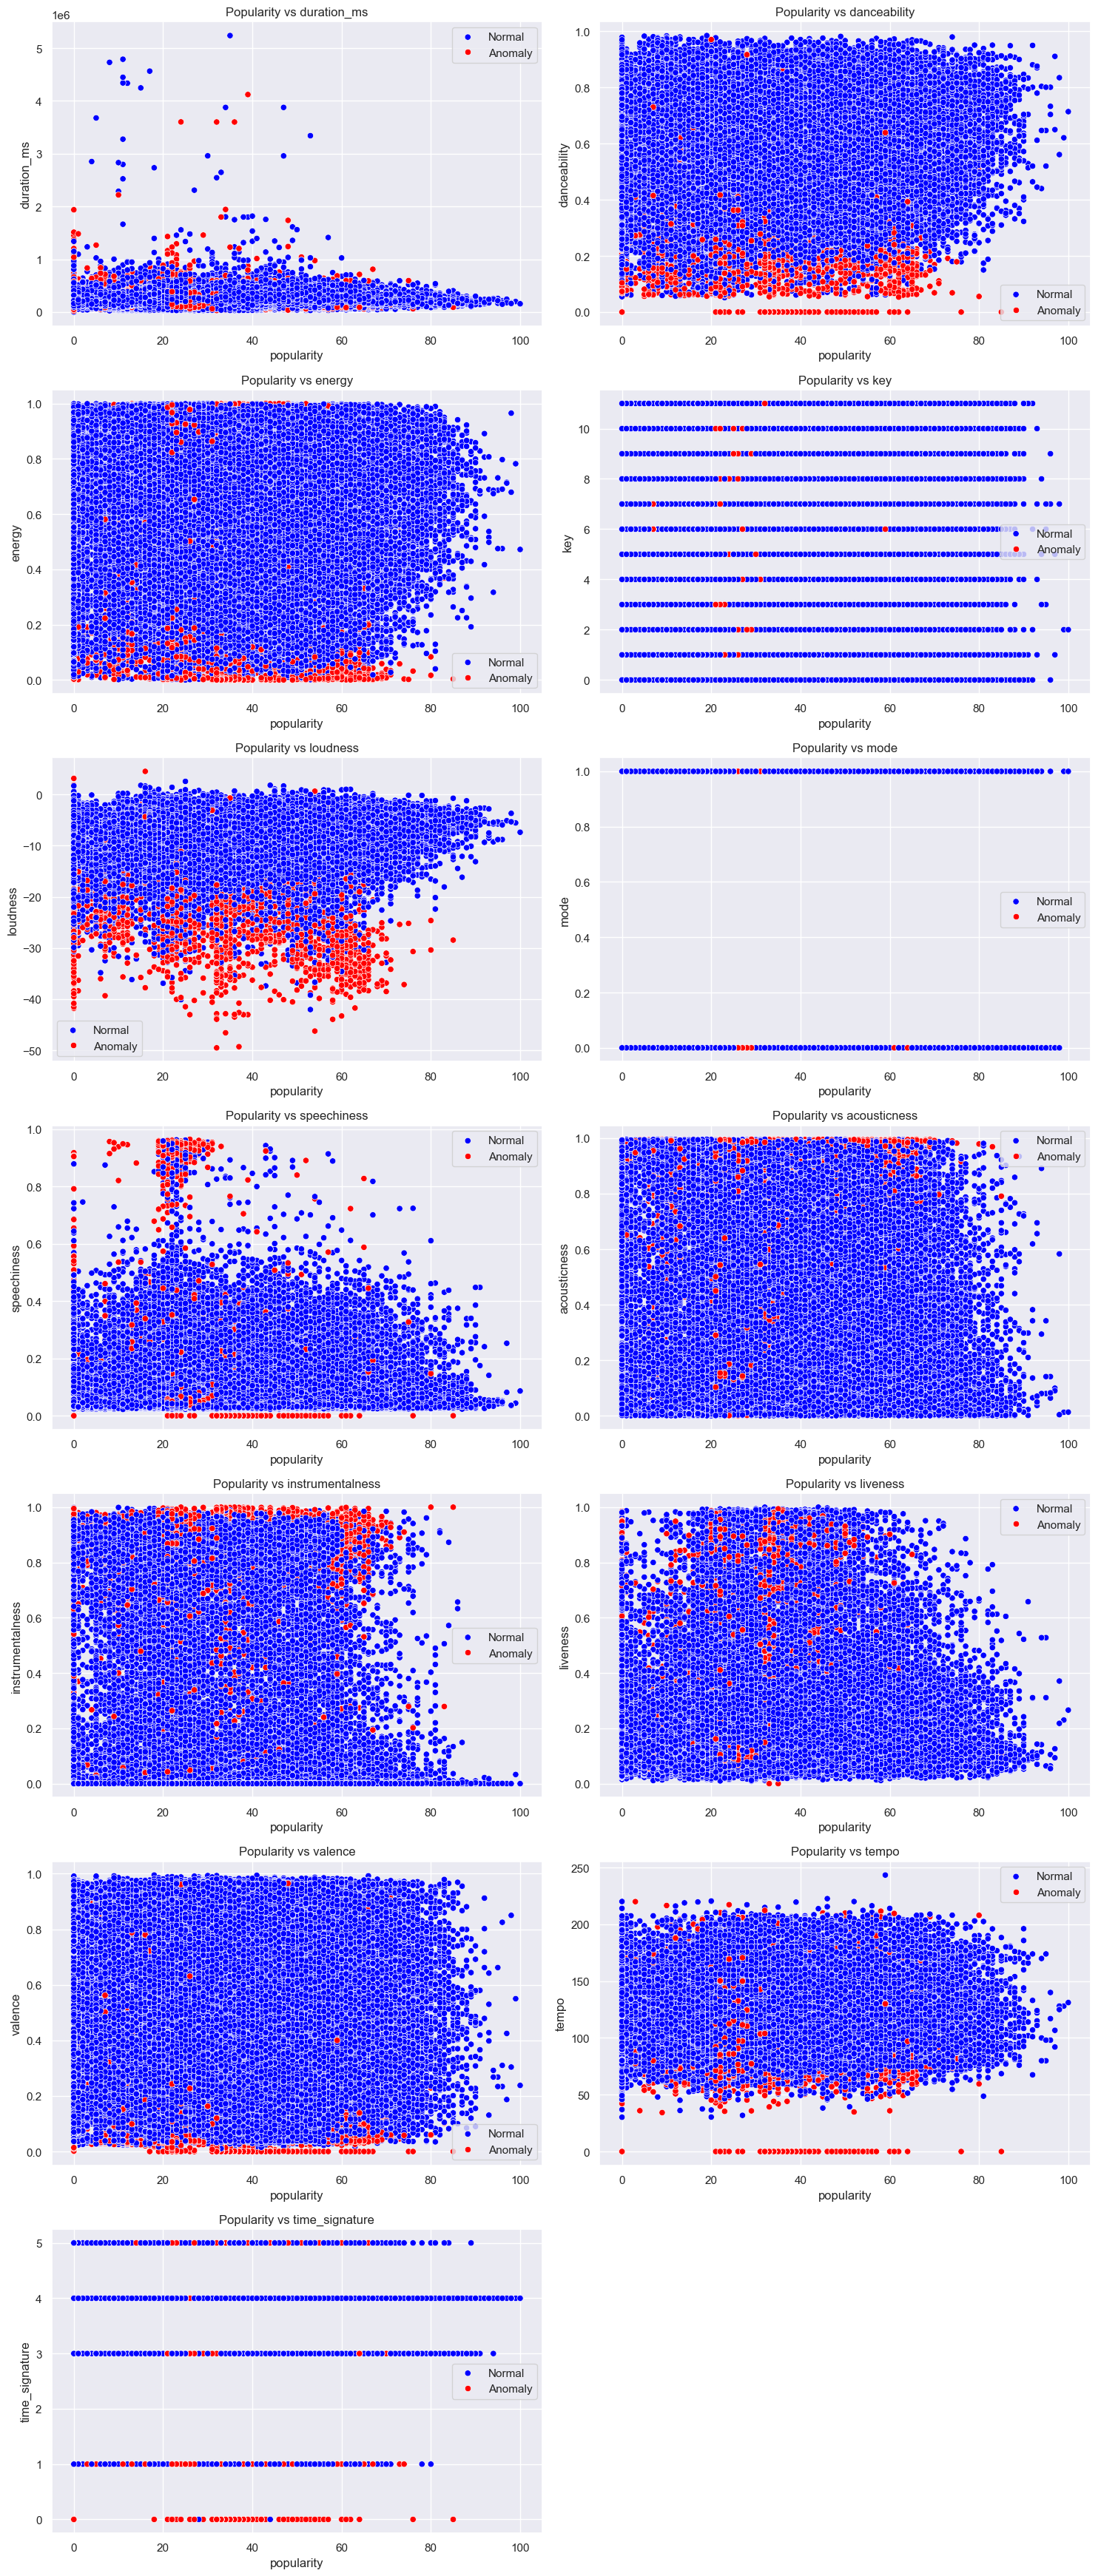

In [4]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

Audiofeatures_columns = ['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 
                         'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
data_numeric = spotifyData[Audiofeatures_columns].fillna(spotifyData[Audiofeatures_columns].median())

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Define the Isolation Forest model with the desired contamination level
contamination_value = 0.03  # You can adjust this as needed
model = IsolationForest(contamination=contamination_value, random_state=42)
spotifyData['Anomaly'] = model.fit_predict(data_scaled)

# Define the features you want to plot against popularity
features_to_plot = Audiofeatures_columns[1:]  # Exclude 'popularity' itself
num_features = len(features_to_plot)

# Set up the subplot grid with 2 graphs per row
fig, axes = plt.subplots(nrows=(num_features // 2) + (num_features % 2), ncols=2, figsize=(15, 5 * ((num_features // 2) + (num_features % 2))))
axes = axes.flatten()  # Flatten to easily iterate over axes

# Loop through each feature to plot popularity against it
for i, feature in enumerate(features_to_plot):
    sb.scatterplot(
        x='popularity', y=feature, hue='Anomaly', data=spotifyData,
        palette={-1: 'red', 1: 'blue'}, ax=axes[i]
    )
    axes[i].set_title(f"Popularity vs {feature}")
    axes[i].legend(['Normal', 'Anomaly'])

# Hide any unused subplots (in case the grid is not perfectly filled)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()